# Project Title
**Comprehensive Water Quality Assessment and Potability Prediction using Multi-parameter Analysis**

## Problem Statement
**The objective of this machine learning problem is to predict whether a given set of water quality parameters meets the potability criteria or not based on the provided features.**

## Data Dictionary
**pH** - Represents the pH level of the water.
Unit: pH (dimensionless)

**Hardness** - Indicates the concentration of minerals, primarily calcium and magnesium, in the water.
Unit: mg/L (milligrams per liter)

**Solids** - Refers to the total dissolved solids in the water, which includes minerals, salts, and organic matter.
Unit: ppm (parts per million)

**Chloramines** - Represents the concentration of chloramines, which are disinfection byproducts formed when chlorine is used for water treatment.
Unit: ppm (parts per million)

**Sulfate** - Indicates the concentration of sulfate ions in the water.
Unit: mg/L (milligrams per liter)

**Conductivity** - Reflects the water's ability to conduct an electrical current, which is influenced by dissolved ions.
Unit: µS/cm (micro Siemens per centimeter)

**Organic carbon** - Indicates the concentration of organic carbon compounds in the water.
Unit: ppm (parts per million)

**Trihalomethanes** - Represents the concentration of trihalomethanes, which are disinfection byproducts formed during water treatment.
Unit: µg/L (micrograms per liter)

**Turbidity** - Refers to the cloudiness or haziness of a fluid caused by large numbers of individual particles.
Unit: NTU (Nephelometric Turbidity Units)

**Potability** (Target Variable) - Indicates whether the water is considered safe for drinking or not.
Values: 0 (Not Potable), 1 (Potable)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import lux

### Here the default encoding(UTF-8) is not working, so we have to use chardet library to detect the encoding.

In [2]:
import chardet

with open("water_potability.csv", "rb") as f:
    result = chardet.detect(f.read())
    
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
# Use the detected encoding
dataset = pd.read_csv("water_potability.csv", encoding=result['encoding'])

In [4]:
df = dataset.copy()
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
df.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [7]:
df.shape

(3276, 10)

In [8]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
df.isnull().sum() * 100 / len(df)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Data Cleaning

In [10]:
# List of column names that need to be converted to float
columns_to_convert = [
    'ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
    'Organic_carbon', 'Trihalomethanes', 'Turbidity'
]

# Create a dictionary to store errors for each column
conversion_errors = {}

for column in columns_to_convert:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError as e:
        conversion_errors[column] = e

# Print the errors and the corresponding strings
for column, error in conversion_errors.items():
    error_indices = df[df[column].apply(lambda x: not pd.to_numeric(x, errors='coerce')).fillna(False)].index
    error_values = df[column][error_indices]
    print(f"Error in column '{column}': {error}")
    print(f"Corresponding strings in column '{column}':")
    print(error_values)

Error in column 'ph': Unable to parse string "7.-.160467231" at position 70
Corresponding strings in column 'ph':
3014    0
Name: ph, dtype: object
Error in column 'Hardness': Unable to parse string "214.496610%457156" at position 19
Corresponding strings in column 'Hardness':
LuxSeries([], Name: Hardness, dtype: object)
Error in column 'Solids': Unable to parse string "18767.656--18134" at position 11
Corresponding strings in column 'Solids':
LuxSeries([], Name: Solids, dtype: object)
Error in column 'Chloramines': Unable to parse string "2.39798!499" at position 2352
Corresponding strings in column 'Chloramines':
LuxSeries([], Name: Chloramines, dtype: object)
Error in column 'Conductivity': Unable to parse string "52,,,3.6712975" at position 21
Corresponding strings in column 'Conductivity':
LuxSeries([], Name: Conductivity, dtype: object)
Error in column 'Organic_carbon': Unable to parse string " ¥12.38 " at position 63
Corresponding strings in column 'Organic_carbon':
LuxSeries([]

In [11]:
# Define a general cleaning function
def clean_value(value):
    if isinstance(value, str):
        # If the value is a string, remove non-numeric characters
        cleaned_value = ''.join(char for char in value if char.isnumeric() or char in ['.', '-'])
        try:
            return float(cleaned_value)
        except ValueError:
            return None  # Return None if cleaning or conversion fails
    else:
        # If the value is not a string, return it as is (assuming it's already a numeric value)
        return value

# Apply the cleaning function to all columns
for column in df.columns:
    df[column] = df[column].apply(clean_value)

In [12]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2784 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3274 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3275 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
df.describe().style.format("{:.2f}")

In [14]:
df[df['ph'] == 0]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
df[df['Chloramines'] <= 0]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

#### Chloramine concentrations should not be negative because they represent the amount of chloramines present in the water, and concentrations cannot be negative in a physical sense.

In [16]:
df.loc[df['Chloramines'] <= 0, 'Chloramines'] = df['Chloramines'].abs()

In [17]:
df[df['Chloramines'] >= 14]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [18]:
df['Chloramines'].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

#### Concentration of Chloramines in water cannot be 10047.0505, i think its a typo error it should be 10.0470505.

In [19]:
df.loc[df['Chloramines'] == 10047.0505, 'Chloramines'] = 10.0470505

In [20]:
df[df['Organic_carbon'] >= 30]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

#### Concentration of Organic_carbon in water cannot be "25000.00050" and "91456.65413", i think its a typo error it should be "25.00000050" and "9.145665413".

In [21]:
df.loc[df['Organic_carbon'] == 25000.00050, 'Organic_carbon'] = 25.00000050
df.loc[df['Organic_carbon'] == 91456.65413, 'Organic_carbon'] = 9.145665413

## Pandas Profiling.

In [22]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file= 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Exploratory Data Analysis for each Features.
**Descriptive Statistics**
We start by analyzing the descriptive statistics for each numerical column:

  - Descriptive Statistics:
    - Mean: [mean_value]
    - Standard Deviation: [standard_deviation]
    - Minimum: [min_value]
    - 25th Percentile: [25th_percentile]
    - Median (50th Percentile): [median_value]
    - 75th Percentile: [75th_percentile]
    - Maximum: [max_value]
    
## Visualizations
**we create visualizations to better understand the distribution of each numerical column:**

Column: ph
Descriptive Statistics:
count    2784.000000
mean        7.080766
std         1.594605
min         0.000000
25%         6.092665
50%         7.035894
75%         8.062251
max        14.000000
Name: ph, dtype: float64
Visualizations:


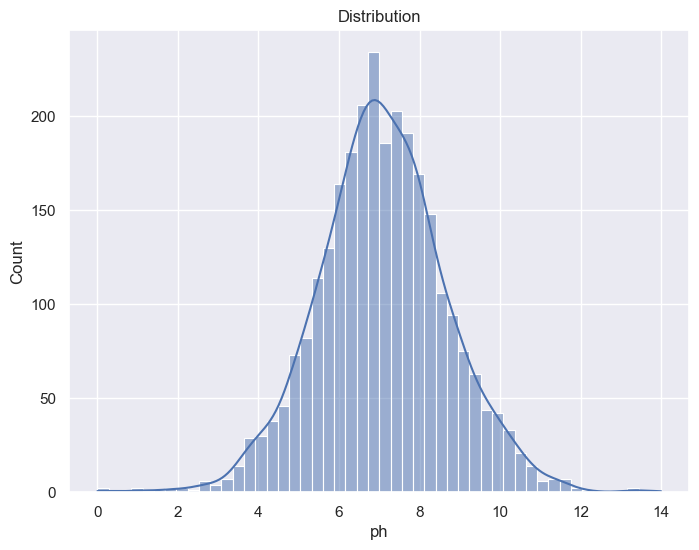

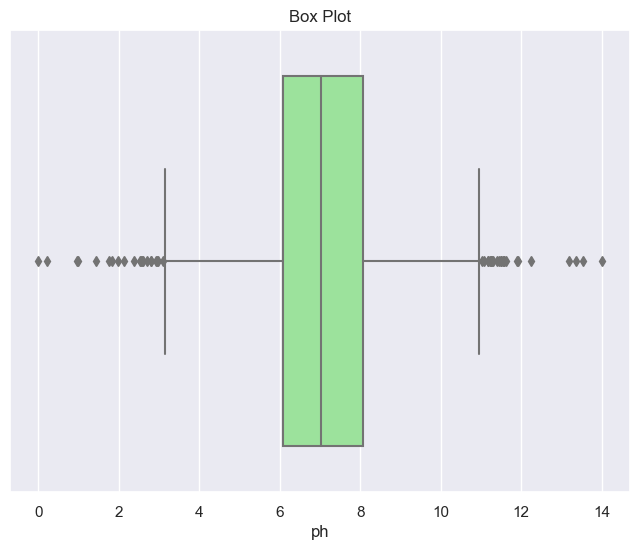


************************************************************************************************************************

Column: Hardness
Descriptive Statistics:
count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64
Visualizations:


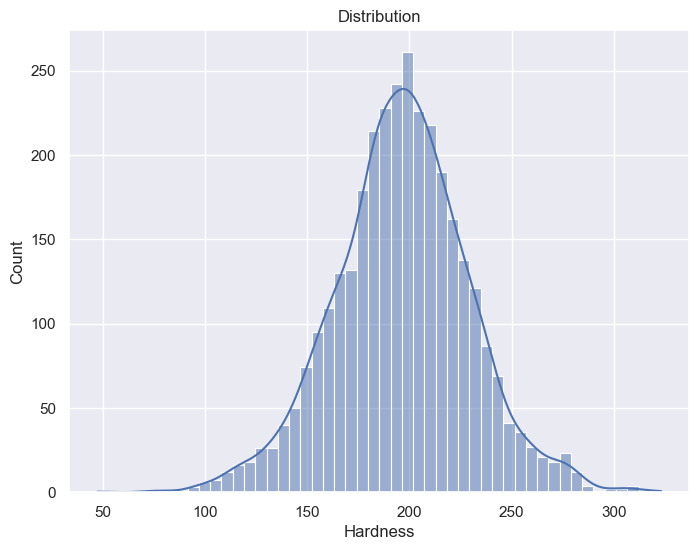

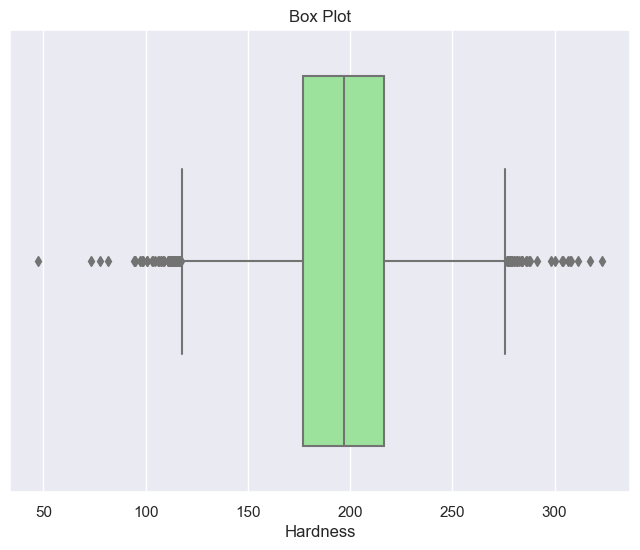


************************************************************************************************************************

Column: Solids
Descriptive Statistics:
count     3274.000000
mean     22016.534162
std       8770.673014
min        320.942611
25%      15663.523660
50%      20939.066780
75%      27335.562455
max      61227.196010
Name: Solids, dtype: float64
Visualizations:


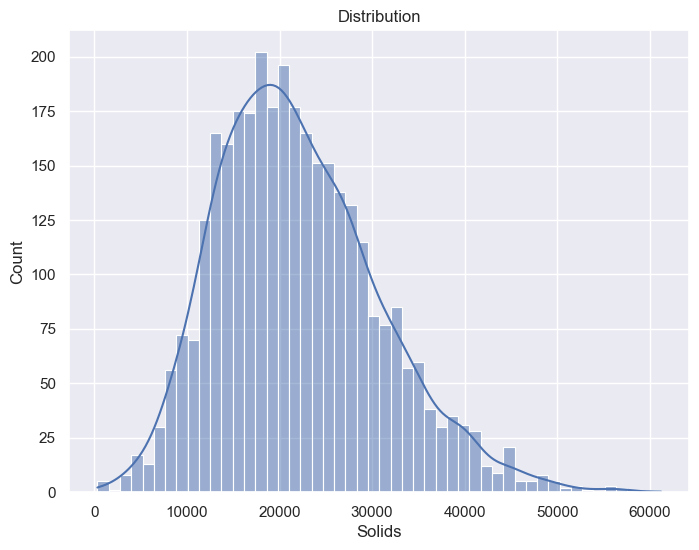

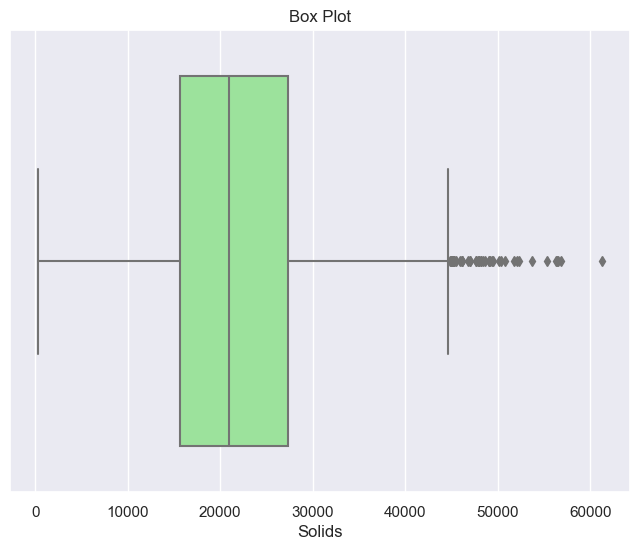


************************************************************************************************************************

Column: Chloramines
Descriptive Statistics:
count    3276.000000
mean        7.123190
std         1.583908
min         0.352000
25%         6.127421
50%         7.131070
75%         8.115458
max        13.127000
Name: Chloramines, dtype: float64
Visualizations:


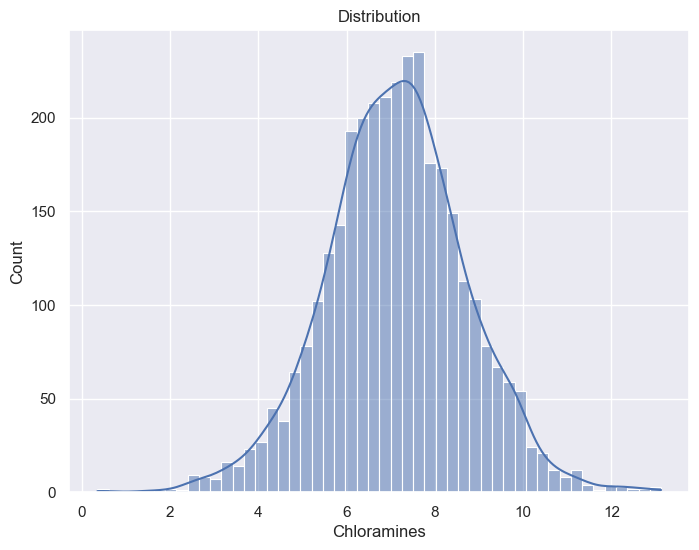

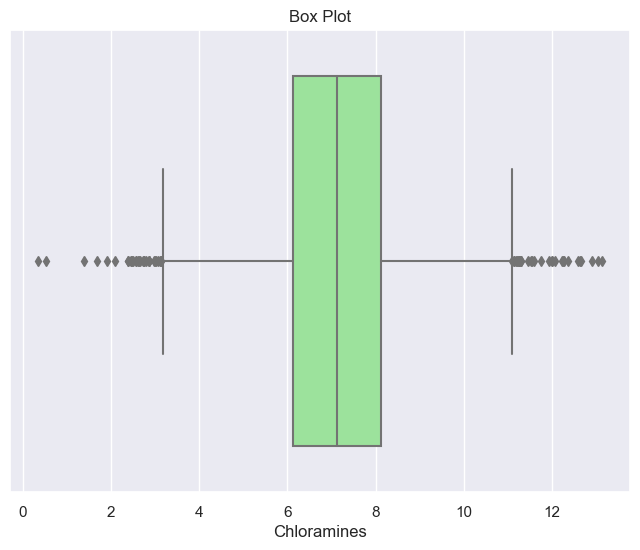


************************************************************************************************************************

Column: Sulfate
Descriptive Statistics:
count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64
Visualizations:


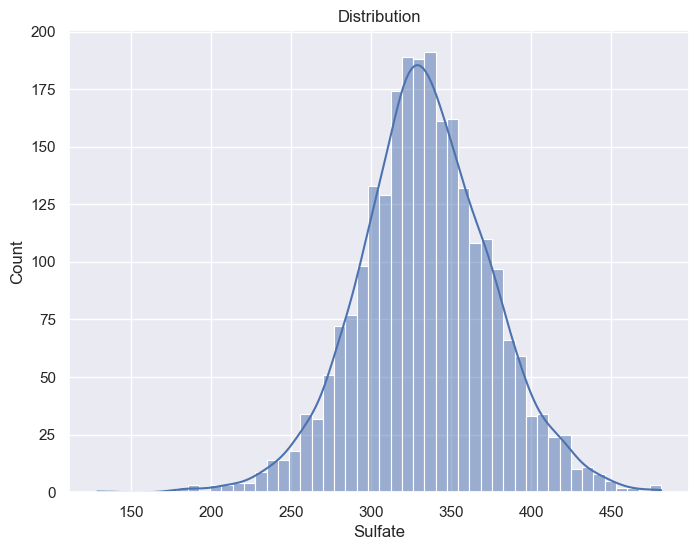

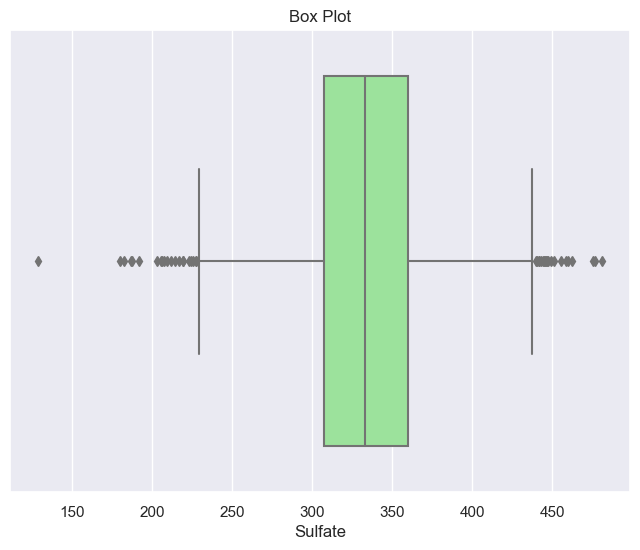


************************************************************************************************************************

Column: Conductivity
Descriptive Statistics:
count    3275.000000
mean      426.236381
std        80.816584
min       181.483754
25%       365.787248
50%       421.890083
75%       481.812675
max       753.342620
Name: Conductivity, dtype: float64
Visualizations:


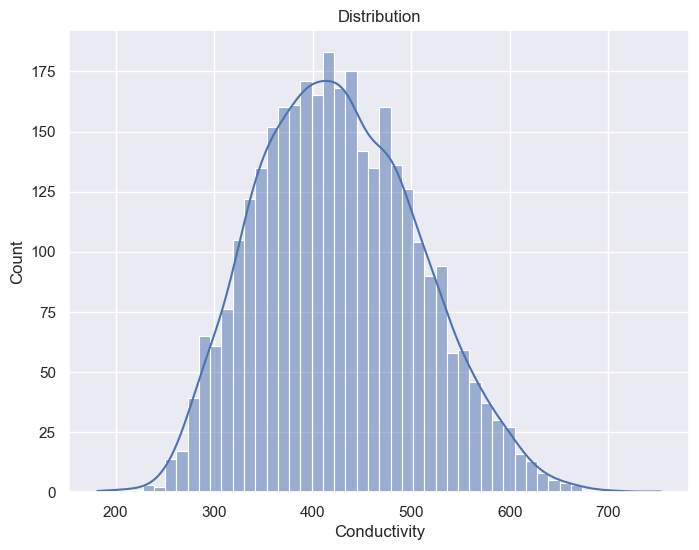

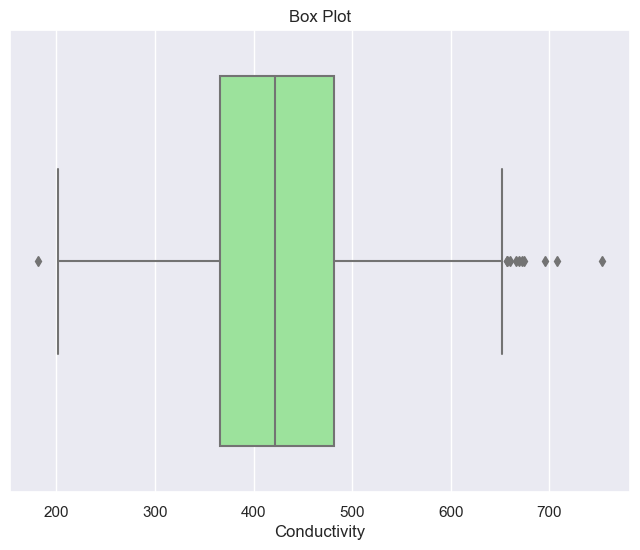


************************************************************************************************************************

Column: Organic_carbon
Descriptive Statistics:
count    3276.000000
mean       14.288365
std         3.313658
min         2.200000
25%        12.065801
50%        14.219418
75%        16.559114
max        28.300000
Name: Organic_carbon, dtype: float64
Visualizations:


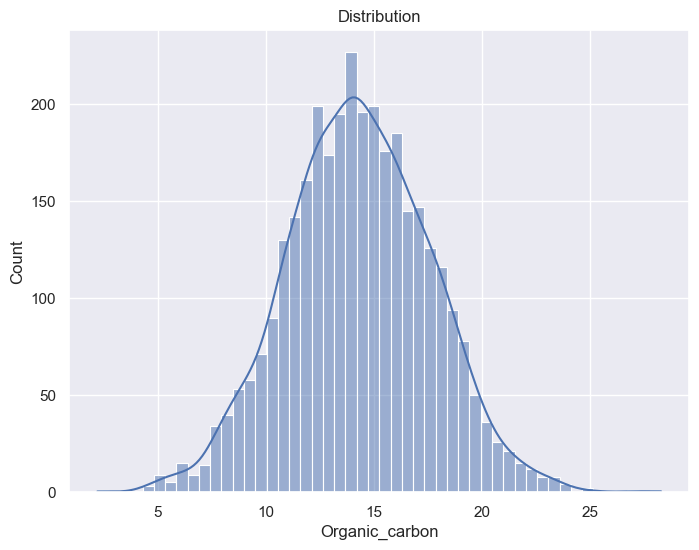

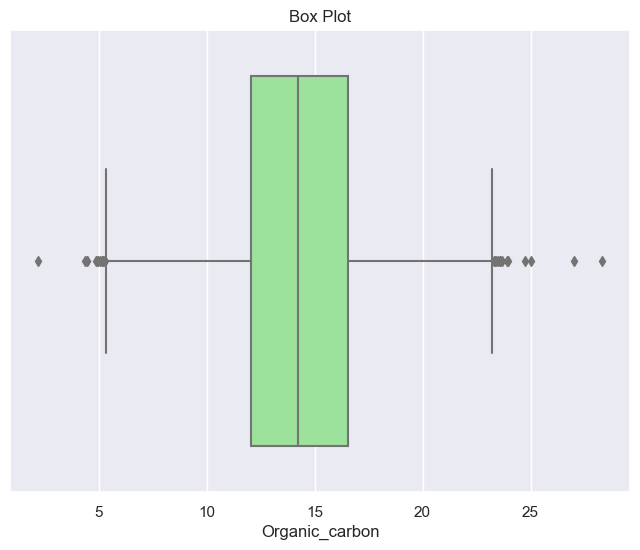


************************************************************************************************************************

Column: Trihalomethanes
Descriptive Statistics:
count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trihalomethanes, dtype: float64
Visualizations:


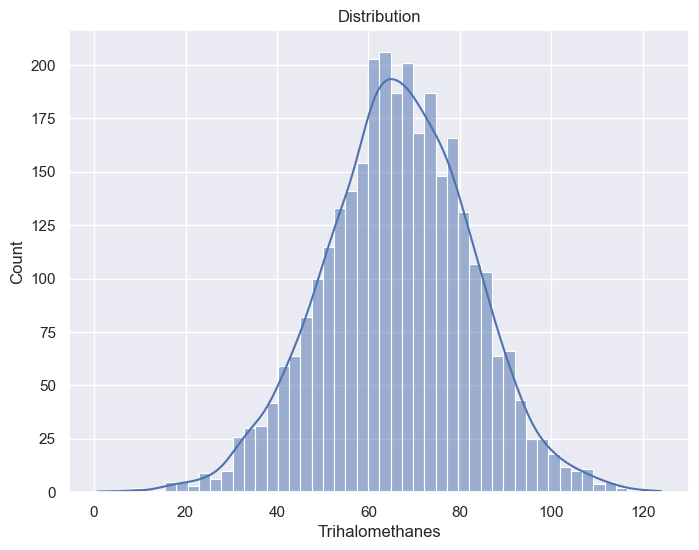

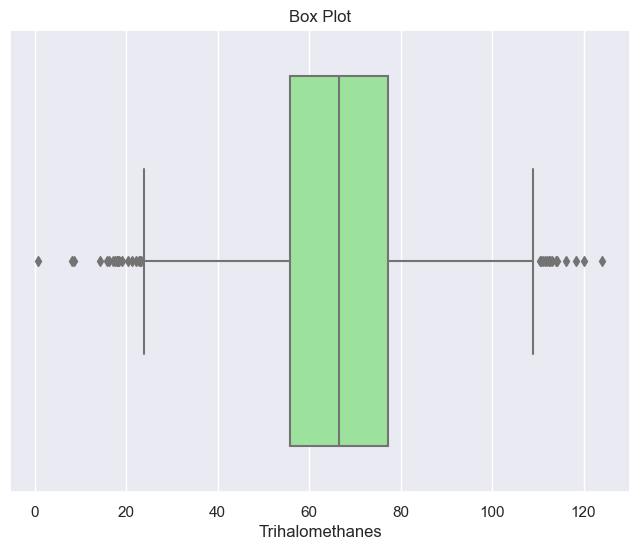


************************************************************************************************************************

Column: Turbidity
Descriptive Statistics:
count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64
Visualizations:


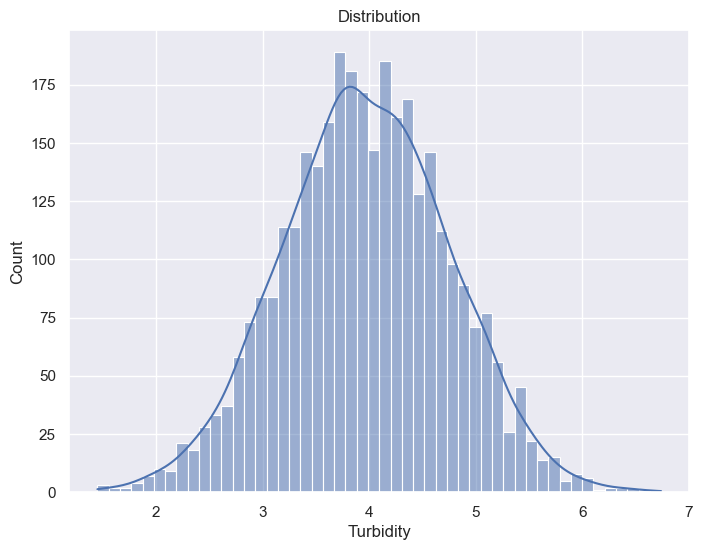

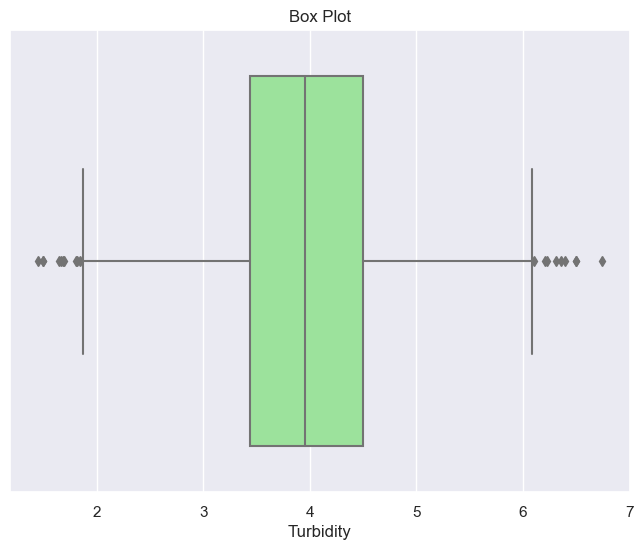


************************************************************************************************************************

Column: Potability
Descriptive Statistics:
count    3276.000000
mean        0.103175
std         0.304233
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Potability, dtype: float64
Visualizations:


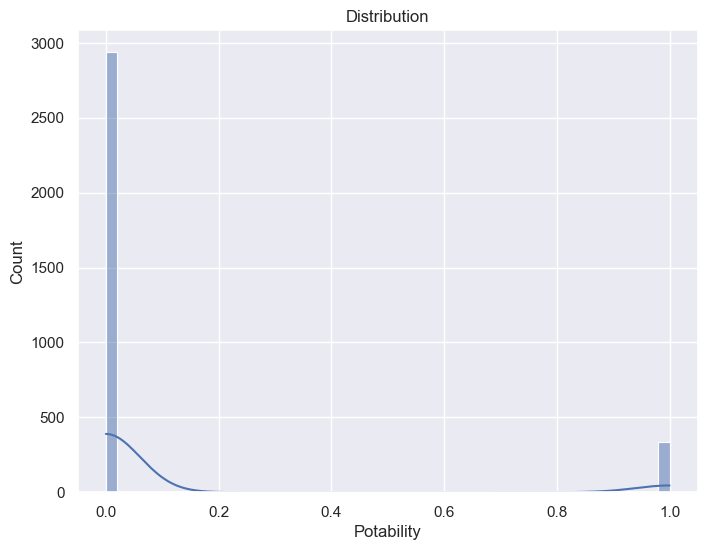

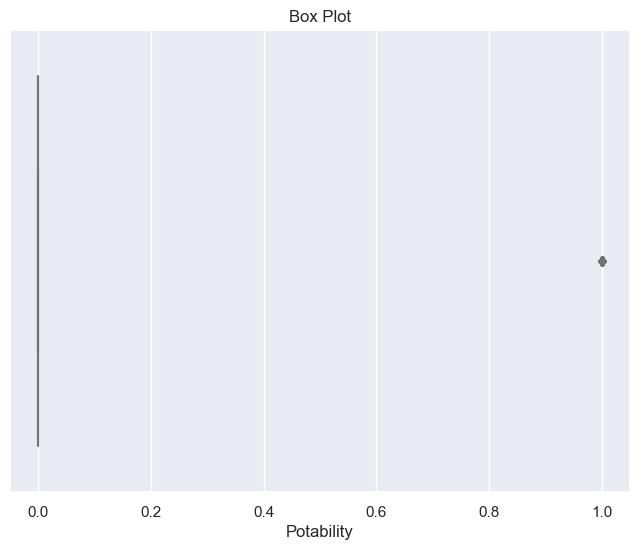


************************************************************************************************************************



In [23]:
for column in df.columns:
    print(f"Column: {column}")
    print("Descriptive Statistics:")
    print(df[column].describe())
    
    print("Visualizations:")
    
    # Histogram with KDE
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=50)
    plt.title("Distribution")
    plt.show()
    
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title("Box Plot")
    plt.show()
    
    print("\n" + "*" * 120 + "\n")

## Outliers Analysis

In [24]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

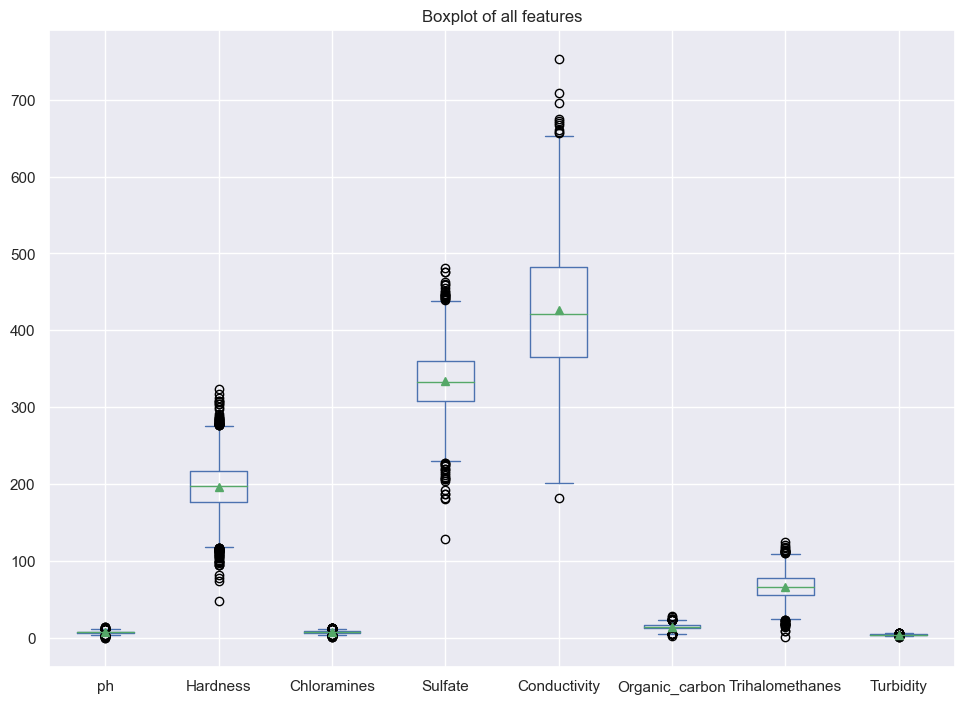

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = df[['ph', 'Hardness', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon','Trihalomethanes','Turbidity']].plot(kind='box', title='Boxplot of all features', showmeans=True)
plt.show()

**In our analysis, we recognized that outliers can represent meaningful and authentic data points rather than errors. We adopted a strategy that preserves these outliers to ensure a comprehensive understanding of the underlying patterns in the dataset.**

In [26]:
df.describe().style.format("{:.2f}")

## Skewness and Kurtosis

We calculate the skewness and kurtosis for each numerical column. Skewness measures the asymmetry of the data distribution, and kurtosis measures the tailedness of the distribution.

In [27]:
stats_df = pd.DataFrame(columns=['Column', 'Skewness', 'Kurtosis'])

# Calculate skewness and kurtosis for each column and store in the DataFrame
for column in df.columns:
    skewness = df[column].skew()
    kurtosis = df[column].kurt()
    stats_df = stats_df.append({'Column': column, 'Skewness': skewness, 'Kurtosis': kurtosis}, ignore_index=True)

stats_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [28]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Filling in Missing Values by Utilizing the Mean of Respective Features.

In [29]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())
df["Solids"] = df["Solids"].fillna(df["Solids"].mean())
df["Conductivity"] = df["Conductivity"].fillna(df["Conductivity"].mean())

In [30]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [31]:
df[df.duplicated()]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [32]:
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [33]:
import dtale
dtale.show(df)

**The histograms provide a visual representation of the distribution of various water quality features, categorized by potability. Below are key observations:**

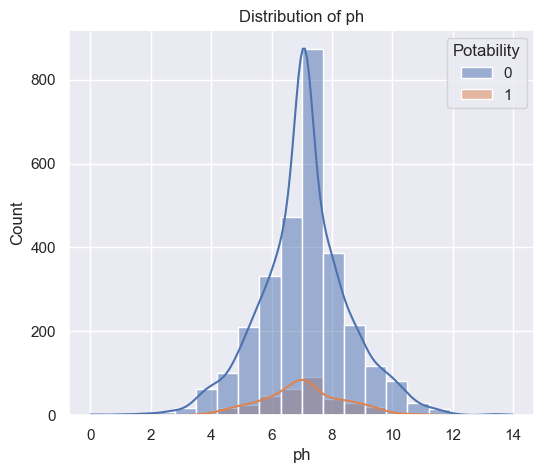

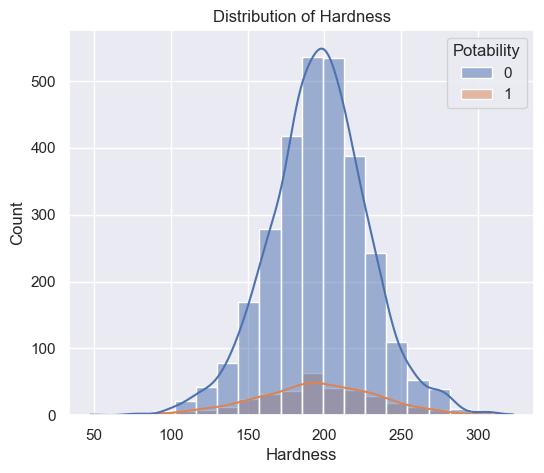

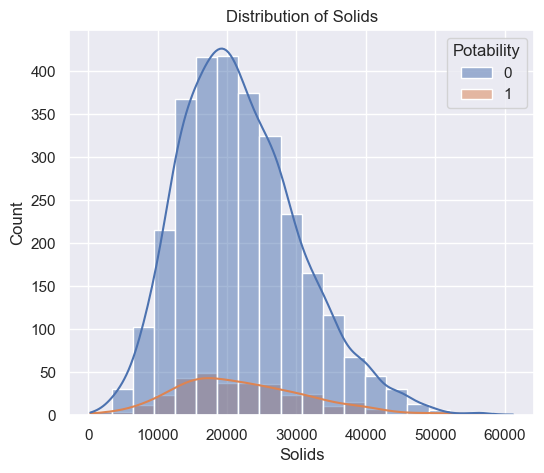

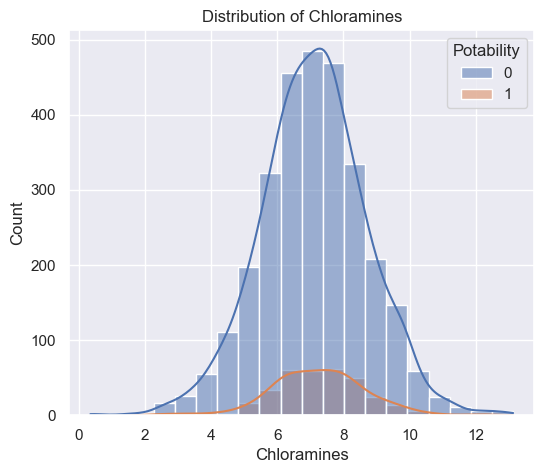

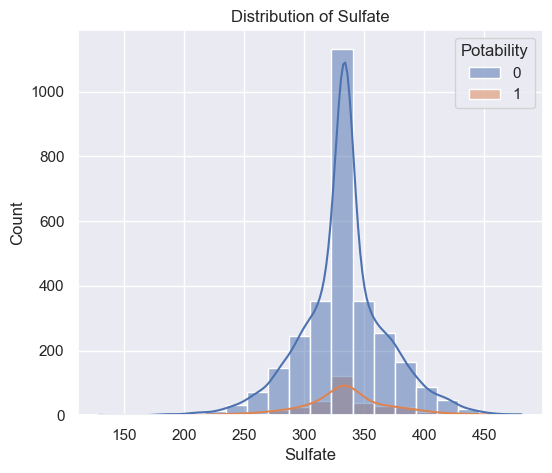

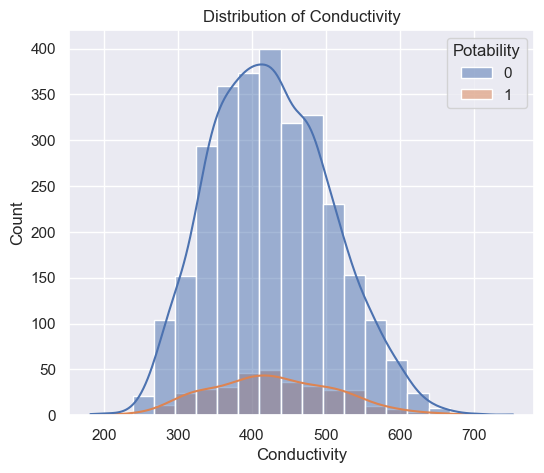

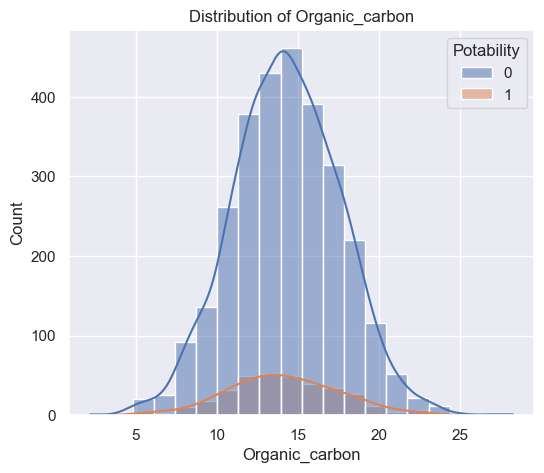

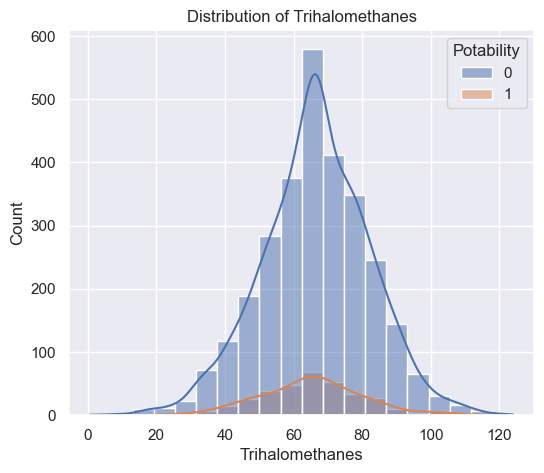

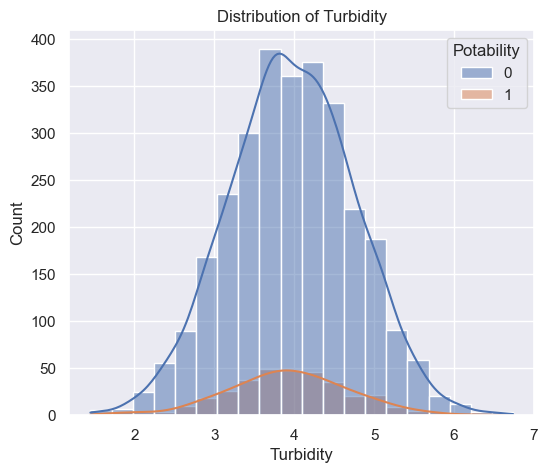

In [34]:
columns = df.columns.drop('Potability')
for col in columns:
    plt.figure(figsize=(6, 5))
    sns.histplot(data=df, x=col, kde=True,hue='Potability', bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

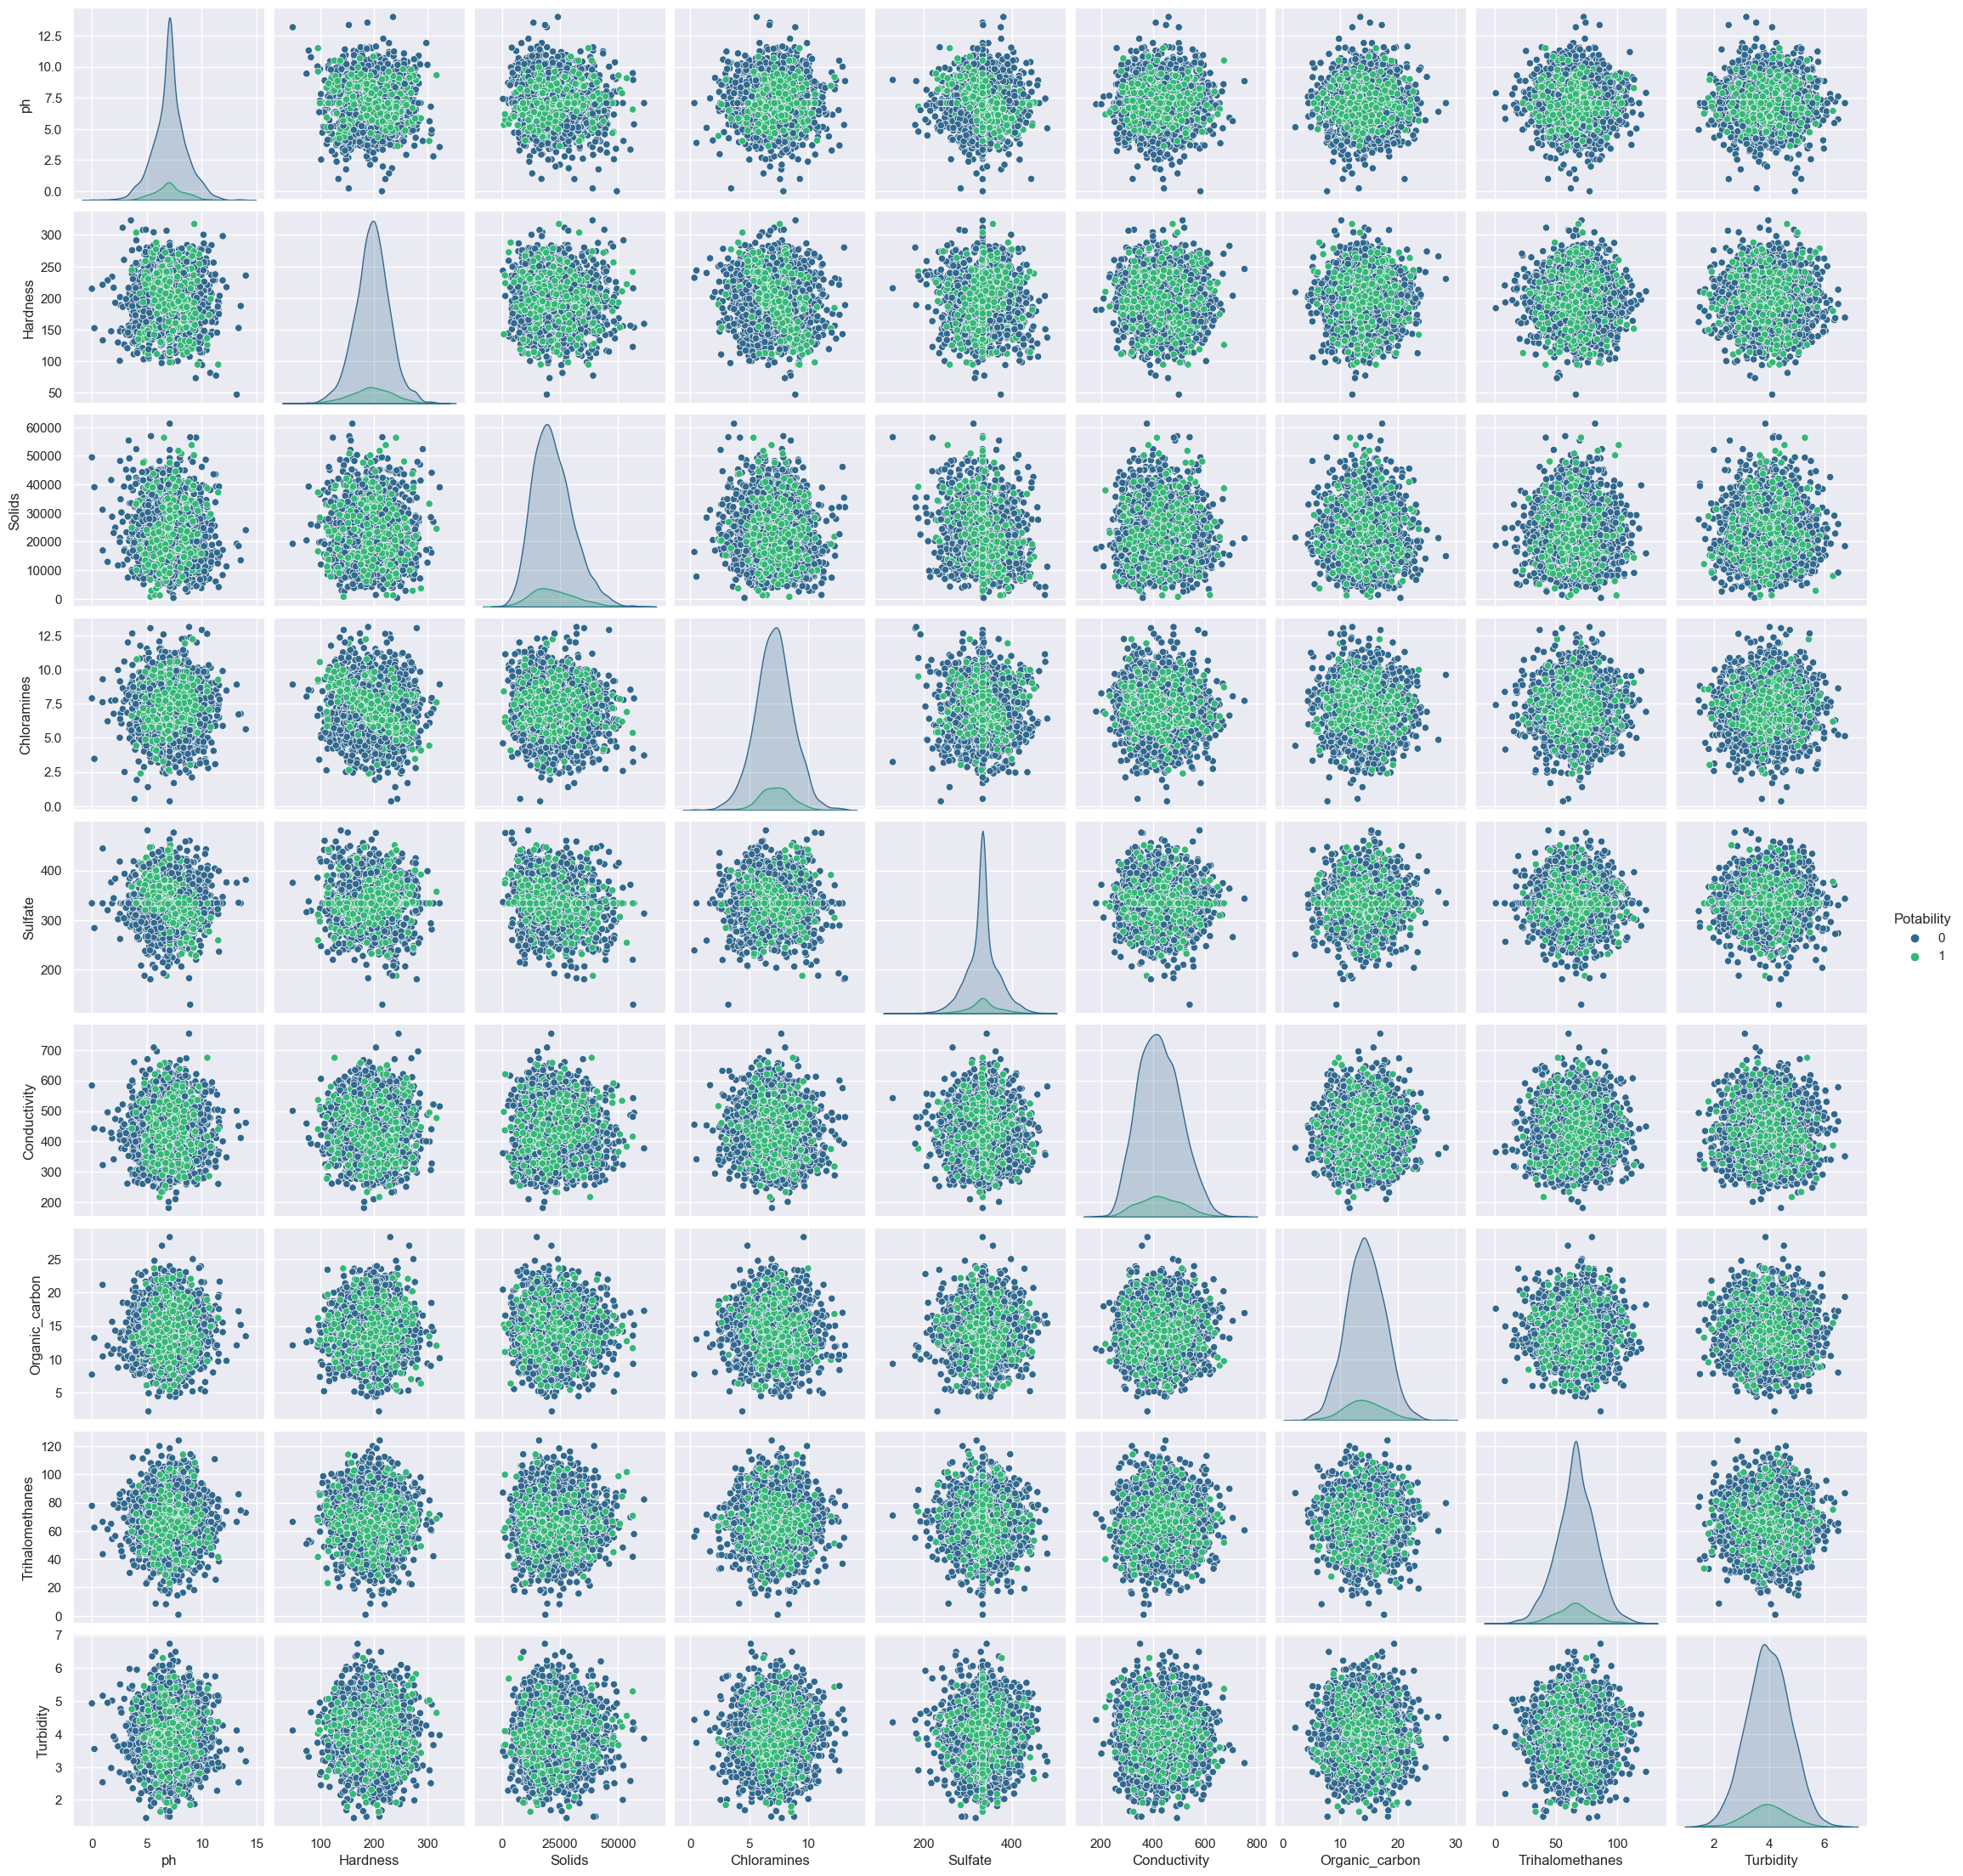

In [35]:
#plotting paiplot to understand the relationship between variables
sns.pairplot(df,hue='Potability',palette='viridis');

## Visualizing Feature Correlation with Heatmap

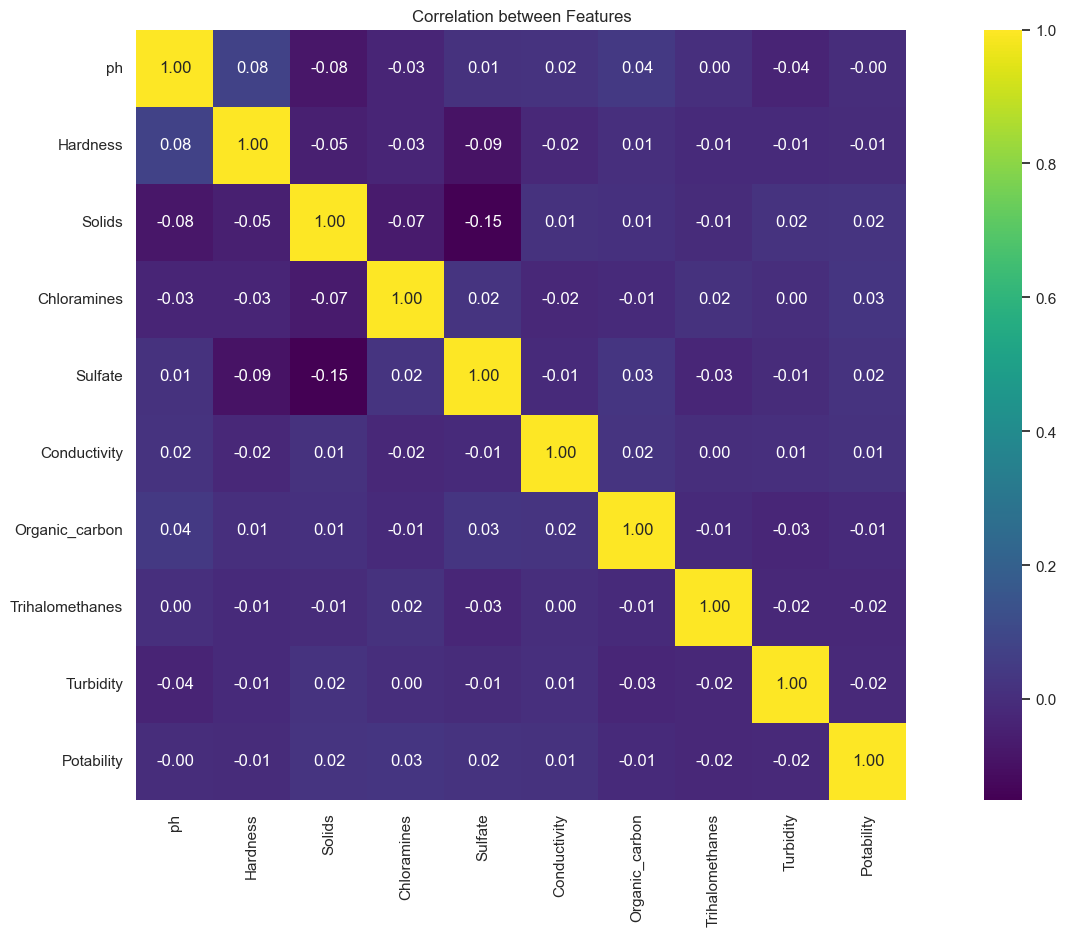

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt=".2f", square=True)
plt.title('Correlation between Features')
plt.show()

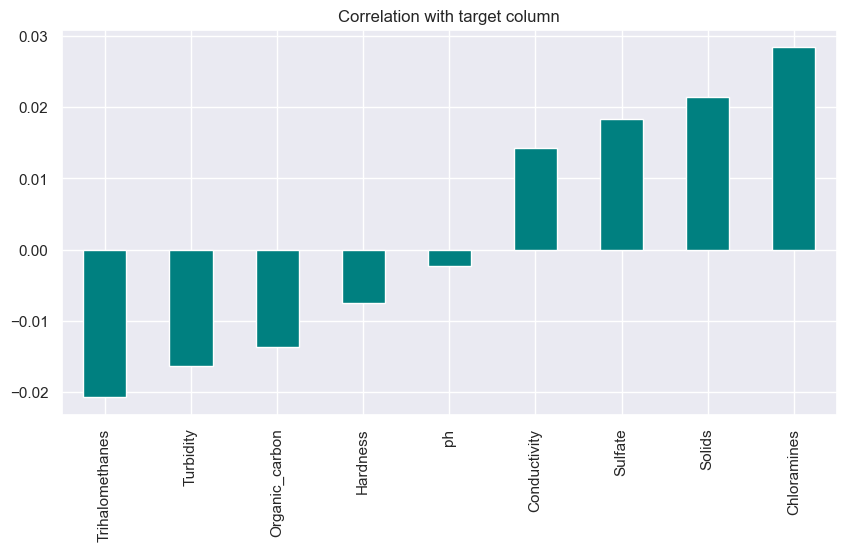

In [37]:
# lets look at the correlation of other features with target column
plt.figure(figsize=(10,5),dpi=100)
df.corr()['Potability'].sort_values(ascending=True)[:-1].plot(kind='bar',color='teal')
plt.title('Correlation with target column');

**OBSERVATIONS**
- The magnitude of correlation coefficients provides a measure of the strength of the relationship. Features with higher absolute values have a more significant impact on water potability.
- Trihalomethanes, Turbidity, Organic Carbon, Hardness, and pH exhibit negative correlations with water potability. Higher values in these features may suggest a potential decrease in water potability.
- Conductivity, Sulfate, Solids, and Chloramines show positive correlations with water potability. Elevated levels of these features might be indicative of increased water potability.

**Recommendations:**
- Monitoring and managing the levels of Chloramines, Solids, Sulfate, and Conductivity can positively contribute to water potability.
- Attention to Trihalomethanes, Turbidity, Organic Carbon, Hardness, and pH is essential to ensure water safety.

### Splitting Independent and Dependent variables.

In [38]:
x = df.drop(['Potability'], axis=1)
y = df['Potability']

In [39]:
x.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [40]:
from sklearn.linear_model import Lasso

# Fit LASSO regression
lasso = Lasso(alpha=0.1)
lasso.fit(x, y)

Lasso(alpha=0.1)

In [41]:
feature_names = x.columns

# Print feature names and coefficients
for feature, coefficient in zip(feature_names, lasso.coef_):
    print(f"{feature}: {coefficient}")

ph: -0.0
Hardness: -0.0
Solids: 8.057390379500667e-07
Chloramines: 0.0
Sulfate: 0.00010758727754699473
Conductivity: 3.757019260647351e-05
Organic_carbon: -0.0
Trihalomethanes: -0.0
Turbidity: -0.0


**Standardizing Feature Data**

- We use the `StandardScaler` from scikit-learn to standardize (scale) the feature data in our dataset. Standardization is an important preprocessing step in machine learning.

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)

**Calculating Variance Inflation Factor (VIF)**

- We calculate the Variance Inflation Factor (VIF) for the features in our dataset. VIF is a measure that helps us assess the multicollinearity among features in a regression analysis. High VIF values can indicate that one or more features are highly correlated with others.

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_sc
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

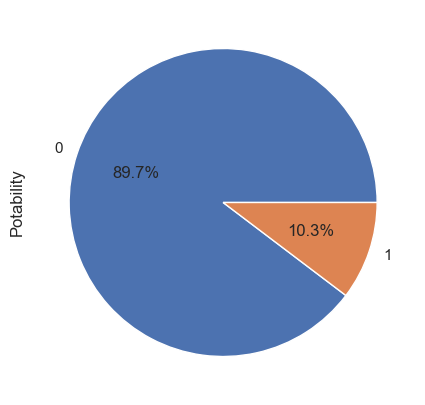

In [44]:
plt.figure(figsize=(5, 5))
y.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

**The RandomOverSampler is applied specifically to the training set (x and y).
The goal is to balance the class distribution by oversampling instances from the minority class.**

In [45]:
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler to the training set only
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x_sc, y)

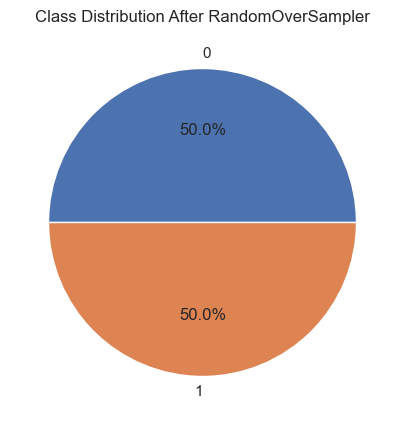

In [46]:
unique_values, counts = np.unique(y_ros, return_counts=True)

plt.figure(figsize=(5, 5))
plt.pie(counts, labels=unique_values, autopct='%1.1f%%')
plt.title('Class Distribution After RandomOverSampler')
plt.show()

## Splitting the data into Train and Test set

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.25, random_state=101)

## Importing Machine Learning Tools

We import various machine learning models, evaluation metrics, and utility functions that are essential for building, evaluating, and fine-tuning machine learning models.

### Machine Learning Models:

- LogisticRegression: A linear classification model.
- GaussianNB: A Gaussian Naive Bayes classifier for probabilistic classification.
- SVC: Support Vector Classifier for classification tasks.
- DecisionTreeClassifier: A decision tree-based classifier.
- RandomForestClassifier: A random forest ensemble classifier.
- AdaBoostClassifier: A classifier using AdaBoost boosting technique.
- GradientBoostingClassifier: A classifier using gradient boosting.
- XGBClassifier: XGBoost, a popular gradient boosting library for classification and regression tasks.


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score,roc_curve, auc, roc_auc_score

from sklearn.model_selection import GridSearchCV, cross_val_score

## Model Evaluation and Comparison

We evaluate and compare the performance of several machine learning algorithms on a classification task. The following steps are performed for each algorithm:

1. Cross-validation: The model is evaluated using cross-validation with 5-fold cross-validation on the test set to assess its generalization performance.

2. Training: The model is trained on the entire training dataset (`x_train` and `y_train`).

3. Predictions: Predictions are made on both the training and testing datasets.

4. Evaluation Metrics: The following evaluation metrics are calculated for each model:
   - Train Accuracy: The accuracy of the model on the training set.
   - Test Accuracy: The accuracy of the model on the test set.
   - Precision: Precision score, a measure of the model's ability to correctly identify positive cases.
   - Recall: Recall score, a measure of the model's ability to find all relevant instances.
   - F1 Score: The harmonic mean of precision and recall, providing a balanced measure.
   - ROC AUC: Receiver Operating Characteristic Area Under the Curve (ROC AUC) score.

5. Collection of Results: Evaluation results, including classification reports, and the calculated metrics are collected and stored in the `results_dataset`.

The code iterates through a set of machine learning algorithms, evaluating and comparing their performance on the classification task, and collecting the results for further analysis and comparison.

In [49]:
algorithms = {
    "Logistic Regression": LogisticRegression(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

results_dataset = []

for algorithm_name, model in algorithms.items():    
    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, x_test, y_test, cv=5, scoring='accuracy')

    # Train the model on the entire training set
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Collect and print evaluation results
    results = {
        "classification Report Training" : classification_report(y_train, y_pred_train),
        "Classification Report Testing": classification_report(y_test, y_pred)
    }
    
    results1 = {
        "Algorithm Name": algorithm_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1score,
        "AUC": roc_auc
    }


    print(f"Evaluation Results for {algorithm_name}:")
    for key, value in results.items():
        if isinstance(value, (int, float)):
            print(f"{key}: {value:.4f}")
        else:
            print(f"{key}:\n{value}")

    print("*" * 80)
    results_dataset.append(results1)

Evaluation Results for Logistic Regression:
classification Report Training:
              precision    recall  f1-score   support

           0       0.54      0.53      0.54      2194
           1       0.55      0.56      0.55      2213

    accuracy                           0.55      4407
   macro avg       0.55      0.54      0.54      4407
weighted avg       0.55      0.55      0.54      4407

Classification Report Testing:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54       744
           1       0.54      0.60      0.57       725

    accuracy                           0.55      1469
   macro avg       0.56      0.56      0.55      1469
weighted avg       0.56      0.55      0.55      1469

********************************************************************************
Evaluation Results for Gaussian Naive Bayes:
classification Report Training:
              precision    recall  f1-score   support

           0       0.59   

## Saving and Displaying Evaluation Results
**we save the evaluation results of machine learning algorithms to a Pandas DataFrame and then to a CSV file for further analysis and sharing.**
- This code streamlines the process of collecting, storing, and sharing evaluation results, making it easier to compare and analyze the performance of different machine learning models.

In [50]:
# Create a DataFrame from the list of dictionaries
results_dataset = pd.DataFrame(results_dataset)

# Set the 'Algorithm Name' as the index
results_dataset.set_index('Algorithm Name', inplace=True)

# Save the DataFrame to a CSV file
results_dataset.to_csv("results.csv")

# Display the DataFrame
results_dataset

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

**Decision Tree and Random Forest models show very high accuracy on the training set, but Random Forest maintains excellent performance on the test set, indicating robust generalization. XGBoost also performs well in terms of accuracy and precision on the test set.**

## Final Model
**Using RandomForestClassifier and creating final model**

Accuracy Score: 0.9911504424778761
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       744
           1       0.99      0.99      0.99       725

    accuracy                           0.99      1469
   macro avg       0.99      0.99      0.99      1469
weighted avg       0.99      0.99      0.99      1469

--------------------------------------------------------------------------------
Confusion Matrix:


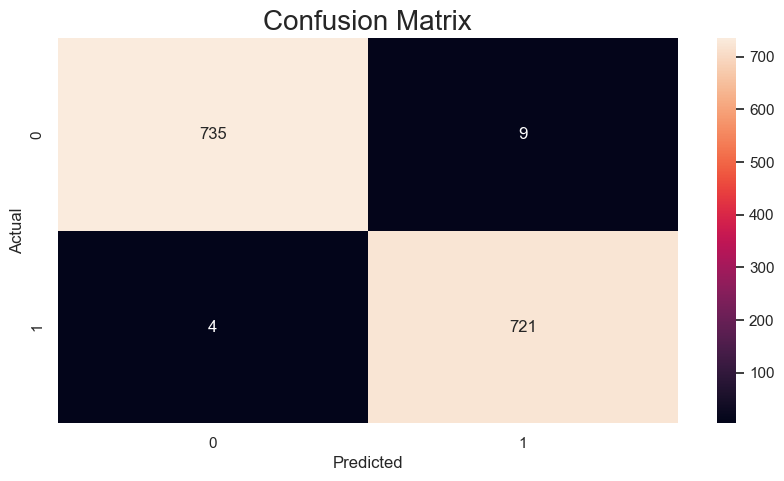

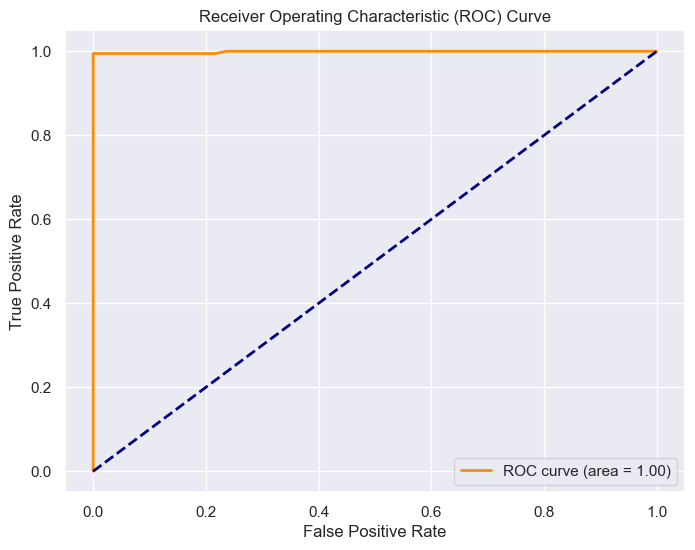

In [51]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print('----'*20)
print(f"Classification Report\n {classification_report(y_test, y_pred)}")
print('----'*20)
print(f"Confusion Matrix:")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f');
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix', fontsize=20) 
plt.show()

# Roc, AUC score
y_score1 = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8, 6))  # Set the figure size for ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Feature Importance Analysis

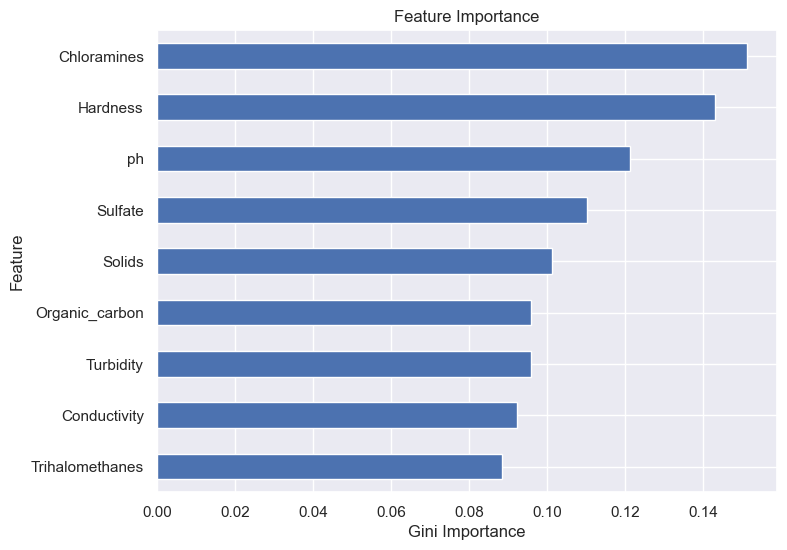

In [52]:
# Get feature names from training data
features = x.columns
# Extract importances from model
importances = model.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
plt.figure(figsize=(8, 6))
feat_imp.plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

## Cross Validation

In [53]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.88414634 0.89618321 0.89465649 0.89465649 0.89618321]
Mean Accuracy: 0.8932
Standard Deviation: 0.0046


**Standard Deviation**
- The standard deviation is relatively small, indicating that the model's performance is consistent across different subsets of the data.

**Mean Accuracy**
- The mean accuracy of approximately 89.32% suggests that, on average, your model is correctly predicting the target variable with this level of accuracy.